In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [20]:
df=pd.read_csv('probe.csv')
df.head()

,t,x,y,z,prank,etype,uidx,eidx,rho,u,v,w,p
0,3.211295e-07,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,4.279629e-11,-9.923974e-13,89769.0
1,8.815134e-07,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,4.869202e-11,-1.122913e-11,89769.0
2,1.647040e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,5.807815e-11,-2.223040e-11,89769.0
3,2.668280e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,6.084827e-11,-3.707606e-11,89769.0
4,4.028759e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,6.188746e-11,-5.721957e-11,89769.0


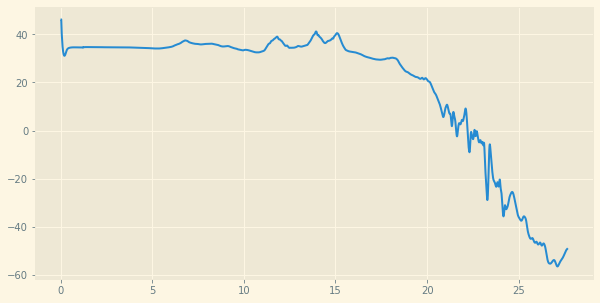

In [28]:
plt.figure(figsize=(10,5))
plt.plot(df.t,df.u)

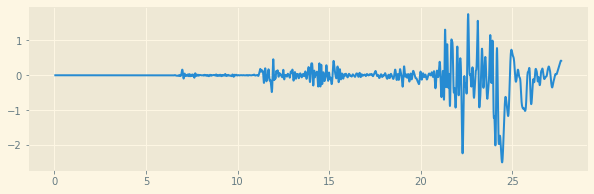

In [29]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.v)

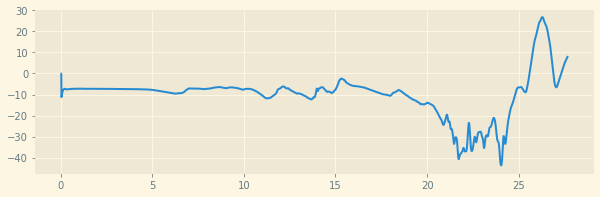

In [30]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.w)

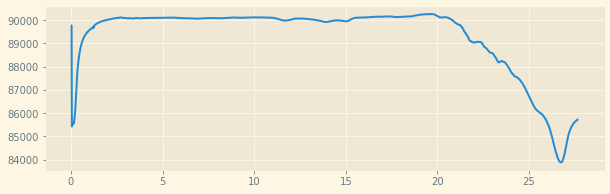

In [31]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.p)

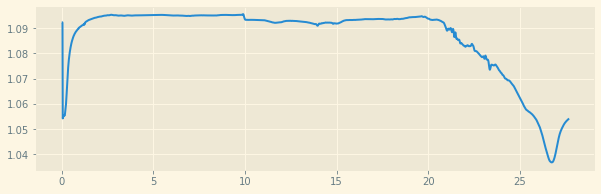

In [32]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.rho)

In [18]:
plt.style.use('Solarize_Light2')

In [33]:
df.shape

(3802, 13)